## Генераторы случайных чисел

In [12]:
import numpy as np
from scipy import stats

def midsquare(val, n=4):
    return int(str(val**2).zfill(2*n)[n//2:-n//2])

seed = 5497
seq = [seed]
for _ in range(100):
    seq.append(midsquare(seq[-1]))
np.array(seq)

array([5497, 2170, 7089, 2539, 4465, 9362, 6470, 8609, 1148, 3179, 1060,
       1236, 5276, 8361, 9063, 1379, 9016, 2882, 3059, 3574, 7734, 8147,
       3736, 9576, 6997, 9580, 7764, 2796, 8176, 8469, 7239, 4031, 2489,
       1951, 8064,  280,  784, 6146, 7733, 7992, 8720,  384, 1474, 1726,
       9790, 8441, 2504, 2700, 2900, 4100, 8100, 6100, 2100, 4100, 8100,
       6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100,
       8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100,
       4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100,
       2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100,
       6100, 2100])

In [13]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
samples = [rng() for _ in range(1000)]

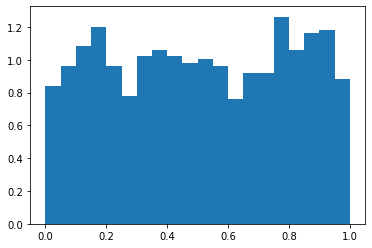

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(samples, bins=20, density=True)
plt.show()

### Задача 1
Реализовать serial test и применить к выборке samples

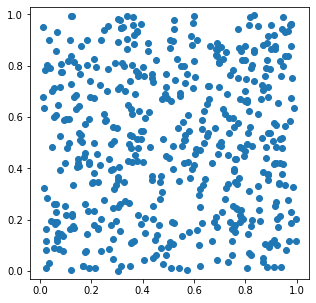

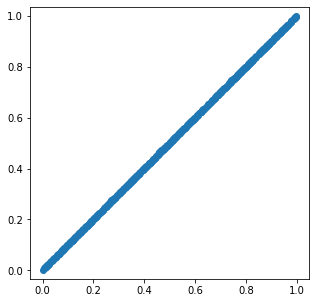

График1 отвечает сэмплу заданному, График2 - отсортированный сэмпл
 Тест хи-квадрат сообщает о том, что сэмпл заданный действительно случаен: ~0.1 - допустимо
 Сэмпл отсоритрованный абсолютно не случаен ~0.0
Вывод - serial test помогает хи-квадрату различать сэмплы отсортированные и обычные


(Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643),
 Power_divergenceResult(statistic=4433.200000000001, pvalue=0.0))

In [15]:
#code here
k = 10
a = np.array(samples)
b = np.sort(a)
fig1 = plt.figure(figsize=(5, 5))
fig1.patch.set_facecolor('xkcd:white')
plt.scatter(a[::2], a[1::2])
plt.axis('equal')
plt.show()
fig2 = plt.figure(figsize=(5, 5))
fig2.patch.set_facecolor('xkcd:white')
plt.scatter(b[::2], b[1::2])
plt.axis('equal')
plt.show()
f = lambda i,j : np.count_nonzero((a[::2] <= (i+1) / 10) & (a[1::2] <= (j+1) / 10) & (a[1::2] >= j / 10) & (a[::2] >= i / 10))
q = lambda i,j : np.count_nonzero((b[::2] <= (i+1) / 10) & (b[1::2] <= (j+1) / 10) & (b[1::2] >= j / 10) & (b[::2] >= i / 10))
f_obs1 = np.reshape(np.fromfunction(np.vectorize(f), (10, 10)), k**2)
f_obs2 = np.reshape(np.fromfunction(np.vectorize(q), (10, 10)), k**2)
f_exp = np.full(k**2, (len(samples)//2) // k**2)
f_obs1, f_obs2, f_exp
print("График1 отвечает сэмплу заданному, График2 - отсортированный сэмпл\n Тест хи-квадрат сообщает о том, что сэмпл заданный действительно случаен: ~0.1 - допустимо\n Сэмпл отсоритрованный абсолютно не случаен ~0.0")
print("Вывод - serial test помогает хи-квадрату различать сэмплы отсортированные и обычные")
stats.chisquare(f_obs1, f_exp), stats.chisquare(f_obs2, f_exp)

### Permutation test

Снова разобъем последовательность $x_1, x_2, x_3, ..., x_{dn}$ на последовательные серии длины d: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), ..., (x_{nd-d}, x_{nd})$. Серия из d элементов может быть упорядочена d! способами и каждый способ упорядочивания равновероятен. Отсюда идея теста - посчитать, сколько раз каждый порядок встречается среди n серий и применить хи-квадрат тест.

### Задача 2
Реализовать permutation test и применить к выборке samples

In [16]:
#code here
import math
d = 4
n = len(samples) // d
a = np.reshape(np.array(samples), (n, -1))
f_exp = np.full(math.factorial(d), n / math.factorial(d)) #в среднем сколько должны встречать каждого порядка
#как присвоить последовательности порядок?
#возьму отклонение от упорядоченного 10**k (к-ый элемент) (он работает, вариантов d!)
#base = d+1 лучше чем 10 (при d>10 не работает), но для наглядности - хорошо (исправляется ЛЕГКО)
def poryadok(d, str_d):
  i = 1
  k = 0
  sum = 0 #0123 (1, 1/0, 2/1/0, 3/2/1/0) если порядок плох, 0 если идеален (в случае d = 4)
  while (k < d):
    while (i < d - k):
      #print(str_d[k], str_d[k+i])
      if (str_d[k] < str_d[k + i]):
        sum += 10**k
      i += 1
    k += 1
    i = 0
  return sum
f = lambda j: poryadok(d, a[j])
a, counts = np.unique(np.vectorize(f)((np.arange(0,n))), return_counts=True)
f_obs = np.zeros(math.factorial(d)) + counts
f_exp, f_obs, stats.chisquare(f_obs, f_exp)
#0.77 - отличный результат


(array([10.41666667, 10.41666667, 10.41666667, 10.41666667, 10.41666667,
        10.41666667, 10.41666667, 10.41666667, 10.41666667, 10.41666667,
        10.41666667, 10.41666667, 10.41666667, 10.41666667, 10.41666667,
        10.41666667, 10.41666667, 10.41666667, 10.41666667, 10.41666667,
        10.41666667, 10.41666667, 10.41666667, 10.41666667]),
 array([ 8., 11.,  6., 10., 15., 17.,  8.,  9.,  8., 10.,  8., 16., 10.,
        11.,  6., 11., 12., 10.,  9., 16., 14.,  6.,  8., 11.]),
 Power_divergenceResult(statistic=22.64, pvalue=0.48194973543642283))

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать неудачно, это может привести к неожиданным последствиям:

In [17]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

Гистограмма распределения похожа на равномерное:

### Задача 3

Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [18]:
#code here
k = 10
h = 300000
good = np.array([rng() for _ in range(h)])
bad = np.array([rng_bad() for _ in range(h)])
f_exp = np.full(k**3, (len(good)//3) // k**3)
def func(arr, i, j, k):
  return np.count_nonzero((arr[::3] <= (i+1) / 10) & (arr[1::3] <= (j+1) / 10) & (arr[1::3] >= j / 10) & (arr[::3] >= i / 10) & (arr[2::3] <= (k+1)/ 10) & (arr[2::3] >= k/10))
f = lambda i,j,k : func(good, i, j, k)
q = lambda i,j,k : func(bad, i, j, k)
f_obs1 = np.reshape(np.fromfunction(np.vectorize(f), (10, 10, 10)), k**3)
print(np.sum(f_obs1))
f_obs2 = np.reshape(np.fromfunction(np.vectorize(q), (10, 10, 10)), k**3)
print("Все видно из вышедших pvalue")
stats.chisquare(f_obs1, f_exp), stats.chisquare(f_obs2, f_exp)


100000
Все видно из вышедших pvalue


(Power_divergenceResult(statistic=965.3799999999999, pvalue=0.7721033785083211),
 Power_divergenceResult(statistic=1583.38, pvalue=3.117512570810574e-29))

### Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

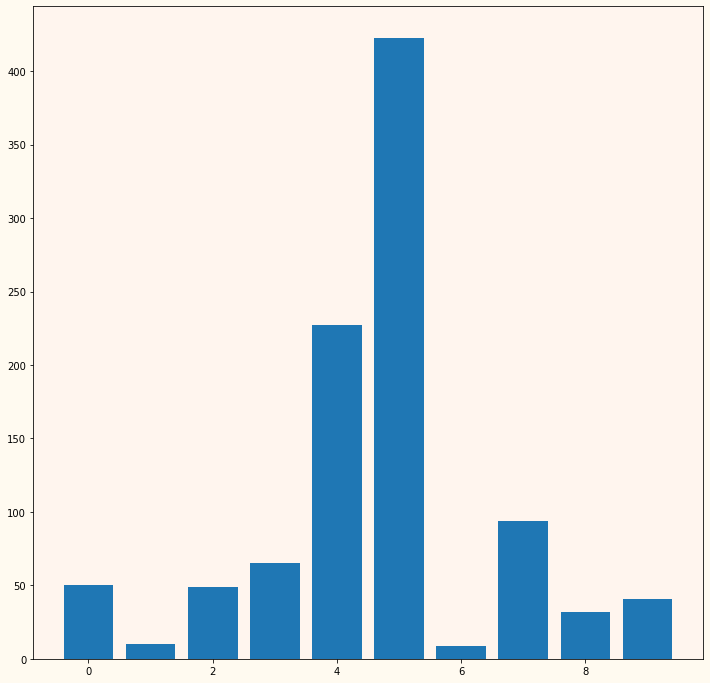

In [19]:
# Solution here
import random
a = [[0, 0.12], [1, 0.3], [2, 0.167], [3, 0.24], [4, 0.31], [5, 0.54], [6, 0.111], [7, 0.02], [8, 0.001], [9, 0.2]]
n = 1000
a.sort(key=lambda x: x[1])
b = np.array(a)
q = np.random.rand(1000)
def func(arr, x):
  i = 0
  while (i <= 8):
    if ((x < arr[i + 1][1]) & (x >= arr[i][1])):
      return arr[i][0]
    i += 1
  return arr[i][0]
f = lambda i: func(b, q[i])
sample = np.vectorize(f)((np.arange(0,n)))


x = np.arange(0, 10)
fig, ax = plt.subplots()
z = lambda i: np.count_nonzero(sample == i)
b = np.vectorize(z)((np.arange(0,10)))
ax.bar(x, b)
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(12)    

plt.show()


### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

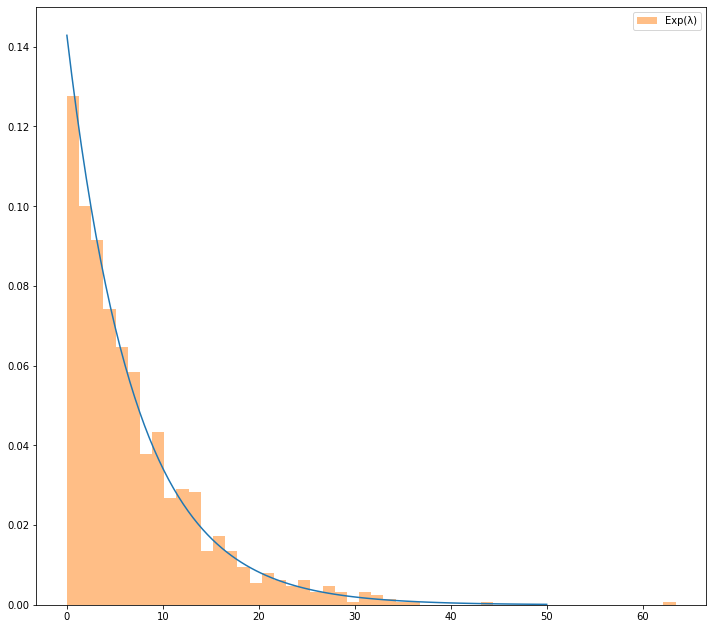

In [20]:
import math
# Solution here
test = 7
def exponential_inverse(lam = 1):
    n = 1000
    U = np.random.rand(n)
    X = -lam*np.log(1-U)

    x = np.linspace(0, 50, 100)
    y = 1/test * np.exp(-x/test)
    plt.figure(figsize=(12,11))
    plt.plot(x, y)
    
    plt.hist(X, bins=50, density = True, alpha=0.5, label = "Exp(λ)")


    plt.legend()
    plt.show()
    return X

a = exponential_inverse(test)
#точный(???) график плотности распределения


### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

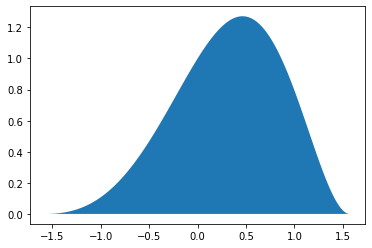

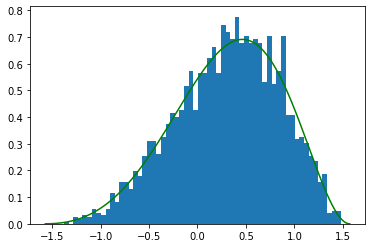

In [21]:
# Solution here (Накрыл равномерным распределением высоты 1.25 из графика)
%matplotlib inline
def dens(y):
  return np.exp(y)*np.cos(y)**2 / integral_value * 2.5

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 10000)

integral_value = (np.exp(np.pi / 2) - np.exp(- np.pi / 2))#нормировочный множитель - эмпирически

qn = np.exp(x)*np.cos(x)**2 # not normalized density!
q = qn / integral_value
plt.fill_between(x, 0, qn)
plt.show()
U = np.random.uniform(-np.pi/2, np.pi/2, 10000) #случайный набор иксов
y = np.random.uniform(0, 1.25, 10000)
origin_f = dens(U)
my_samples = U[y < origin_f]

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.plot(x, dens(x), color = 'green')
plt.hist(my_samples, bins = 60, density = True)
plt.show()


### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

529


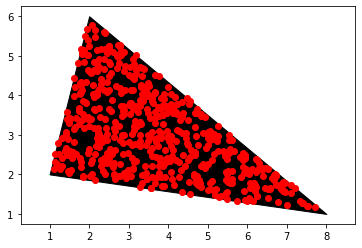

In [22]:
# Solution here
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon], color = 'black'))
plt.axis('equal')

S = 14.5 #площадь треугольника
#хочу отобразить прямоугольный треугольник со сторонами 1,2*S и центром в 0 в заданный
#a = 7/(2*S) #b = 1 #c1 = 1
#c = -1/(2*S) #d = 4 #c2 = 2
#A = np.array((np.random.uniform(0, 2*S, 1000), np.random.uniform(0, 1, 1000))) #1000 пар точек в квадрате
A = np.zeros(2000)
A[::2] = np.random.uniform(0, 2*S, 1000)
A[1::2] = np.random.uniform(0, 1, 1000)
#y = 1 - 1/2s * x
f = lambda i : A[1 + 2*i] < 1 - 1/(2*S) * A[0 + 2*i]
idx = np.array(np.vectorize(f)((np.arange(0, 1000))).nonzero()).reshape(-1)
print(len(idx)) #ровно 500 не получается, но можно взять большую выборку ДО и обрезать idx до 500
B = np.zeros(len(idx) * 2)
B[::2] = (A[2*idx] * 7/(2*S)) + (A[(2*idx + 1)] + 1)
B[1::2] = (A[2*idx] * -1/(2*S)) + (A[(2*idx + 1)] * 4) + 2
height = B[::2]
weight = B[1::2]
plt.scatter(height, weight, color = 'red')

plt.show()




### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

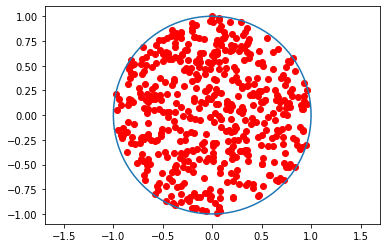

In [23]:
# Solution here
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

#благодаря извлечению корня выборка действительно равномерная (РЕЗУЛЬТАТ ИЗ МАТЕМАТИКИ)
length = np.sqrt(np.random.uniform(0,1,500))
angle = np.pi * np.random.uniform(0,2,500)

x = length*np.cos(angle)
y = length*np.sin(angle)

plt.scatter(x, y, color = 'red')
plt.show()

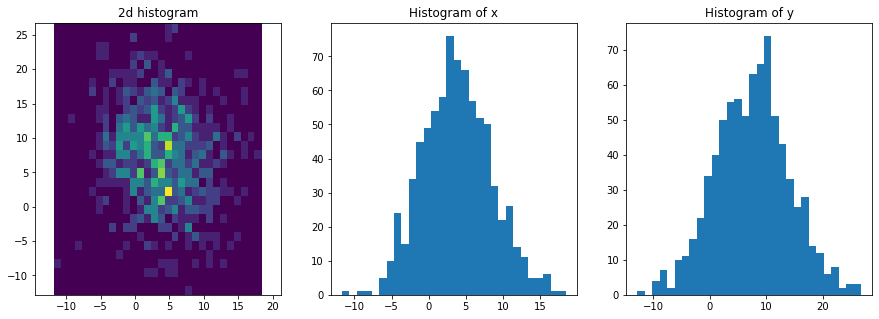

[[21.1647713  -4.60862674]
 [-4.60862674 42.46404945]]


In [66]:
#Задача 9
n = 1000
def qx(x, y):
    s = x**2 + y**2
    return x*np.sqrt((-2*np.log(s))/s)
def qy(x, y):
    s = x**2 + y**2
    return y*np.sqrt((-2*np.log(s))/s)

points = 2*np.random.rand(2*n) - 1
p1 = points[0::2]
p2 = points[1::2]

ind = np.where(p1**2 + p2**2 <= 1)
sample_x = p1[ind]
sample_y = p2[ind]

x = 4 - 2*qx(sample_x, sample_y) + 4*qy(sample_x, sample_y)
y = 7 + 6*qx(sample_x, sample_y) + 2*qy(sample_x, sample_y)


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()
print(np.cov(x, y))